<ipython-input-2-2fd1884c2985>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


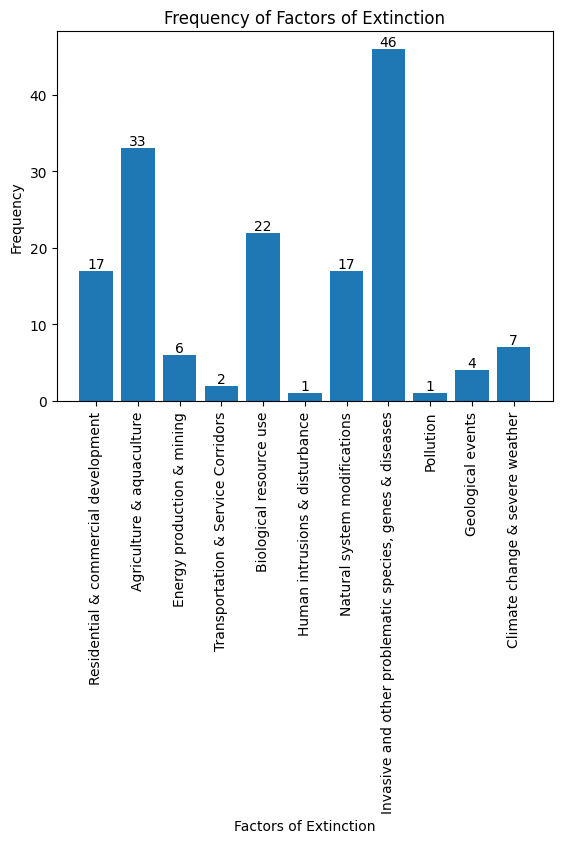

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Flower Extinction Train.csv')

df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

counts_dict_train = {}
weights_dict_train = {}
total_rows = len(df)

for column in df.columns[3:-1]:
    count_ones = df[column].astype(str).eq('1').sum()
    counts_dict_train[column] = count_ones
    weights_dict_train[column] = count_ones / total_rows

df['Risk of Extinction'] = df.apply(lambda row: sum(weights_dict_train[col] * int(row[col]) for col in df.columns[3:-1]), axis=1)

plt.bar(counts_dict_train.keys(), counts_dict_train.values())
plt.xlabel('Factors of Extinction')
plt.ylabel('Frequency')
plt.title('Frequency of Factors of Extinction')

for key, value in counts_dict_train.items():
    plt.text(key, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
print("Weights dictionary:")
print(weights_dict_train)

Weights dictionary:
{'Residential & commercial development': 0.19318181818181818, 'Agriculture & aquaculture': 0.375, 'Energy production & mining': 0.06818181818181818, 'Transportation & Service Corridors': 0.022727272727272728, 'Biological resource use': 0.25, 'Human intrusions & disturbance': 0.011363636363636364, 'Natural system modifications': 0.19318181818181818, 'Invasive and other problematic species, genes & diseases': 0.5227272727272727, 'Pollution': 0.011363636363636364, 'Geological events': 0.045454545454545456, 'Climate change & severe weather': 0.07954545454545454}


In [ ]:
print("\nDataFrame with Risk of Extinction:")
print(df['Risk of Extinction'])


DataFrame with Risk of Extinction:
0     0.477273
1     0.375000
2     1.147727
3     0.125000
4     1.113636
        ...   
83    0.522727
84    0.715909
85    0.522727
86    0.522727
87    0.715909
Name: Risk of Extinction, Length: 88, dtype: float64


In [ ]:
climateAffectedSpecies = []
for index, row in df.iterrows():
    if row['Natural system modifications'] == True or \
       row['Geological events'] == True or \
       row['Climate change & severe weather'] == True:
        climateAffectedSpecies.append(row['Species'])

print(climateAffectedSpecies)
print(len(climateAffectedSpecies))

['Cyanea dolichopoda', 'Dryopteris ascensionis', 'Sporobolus durus', 'Sterculia khasiana', 'Cyanea sessilifolia', 'Logania depressa', 'Stellaria elatinoides', 'Ochrosia kilaueaensis', 'Amaranthus brownii', 'Cenchrus agrimonioides var. laysanensis', 'Delissea niihauensis', 'Delissea subcordata', 'Delissea subcordata subsp. subcordata', 'Delissea subcordata subsp. obtusifolia', 'Hibiscus brackenridgei subsp. molokaiana', 'Scleria chevalieri', 'Faramea chiapensis', 'Eriocaulon inundatum', 'Eriocaulon jordanii', 'Pycnandra micrantha', 'Delissea undulata', 'Fitchia mangarevensis', 'Achyranthes mangarevica', 'Govenia floridana', 'Ceodes rapaensis']
25


In [ ]:
df.head()

,Species,Last Assessed,Status,Residential & commercial development,Agriculture & aquaculture,Energy production & mining,Transportation & Service Corridors,Biological resource use,Human intrusions & disturbance,Natural system modifications,"Invasive and other problematic species, genes & diseases",Pollution,Geological events,Climate change & severe weather,Risk of Extinction
0,Vanvoorstia bennettiana,30/04/2003,EX,1,0,0,1,1,0,0,0,1,0,0,0.477273
1,Oeceoclades seychellarum,21/09/2007,EX,0,1,0,0,0,0,0,0,0,0,0,0.375000
2,Nesiota elliptica,13/06/2005,EX,0,1,0,0,1,0,0,1,0,0,0,1.147727
3,Cyanea dolichopoda,20/06/2016,EX,0,0,0,0,0,0,0,0,0,1,1,0.125000
4,Acalypha wilderi,29/03/2011,EX,1,1,0,1,0,0,0,1,0,0,0,1.113636


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.005789266241965095


In [ ]:
df.to_csv('/content/updated_Flower_Extinction_Dataset.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_test = pd.read_csv('/content/Flower Extinction Test.csv')

df_test.columns = df_test.columns.str.strip()
df_test = df_test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

counts_dict_test = {}
weights_dict_test = {}
total_rows = len(df_test)

for column in df_test.columns[3:-1]:
    count_ones = df_test[column].astype(str).eq('1').sum()
    counts_dict_test[column] = count_ones
    weights_dict_test[column] = count_ones / total_rows

df_test['Risk of Extinction'] = df_test.apply(lambda row: sum(weights_dict_test[col] * int(row[col]) for col in df_test.columns[3:-1]), axis=1)

In [ ]:
print("Weights dictionary:")
print(weights_dict_test)

Weights dictionary:
{'Residential & commercial development': 0.23863636363636365, 'Agriculture & aquaculture': 0.6022727272727273, 'Energy production & mining': 0.11363636363636363, 'Transportation & Service Corridors': 0.125, 'Biological resource use': 0.5227272727272727, 'Human intrusions & disturbance': 0.19318181818181818, 'Natural system modifications': 0.19318181818181818, 'Invasive and other problematic species, genes & diseases': 0.22727272727272727, 'Pollution': 0.09090909090909091, 'Geological events': 0.11363636363636363, 'Climate change & severe weather': 0.14772727272727273}


In [ ]:
climateAffectedSpecies_test = []
for index, row in df_test.iterrows():
    if row['Natural system modifications'] == True or \
       row['Geological events'] == True or \
       row['Climate change & severe weather'] == True:
        climateAffectedSpecies_test.append(row['Species'])

print(climateAffectedSpecies_test)
print(len(climateAffectedSpecies_test))

['Coprosma laevigata', 'Impatiens angustisepala', 'Primula boveana', 'Arrojadoa albiflora', 'Parodia herteri', 'Semecarpus kathalekanensis', 'Micranthocereus streckeri', 'Coleocephalocereus purpureus', 'Uebelmannia buiningii', 'Pinus torreyana', 'Pteris adscensionis', 'Widdringtonia cedarbergensis', 'Diospyros crumenata', 'Juniperus saxicola', 'Aquilaria malaccensis', 'Elaeocarpus venustus', 'Dalbergia cochinchinensis', 'Attalea crassispatha', 'Dypsis interrupta', 'Dypsis oropedionis', 'Cyrtandra lillianae', 'Cyrtandra rarotongensis', 'Sporobolus caespitosus', 'Iris cedreti', 'Paphiopedilum emersonii', 'Lotus kunkelii', 'Isoplexis chalcantha', 'Argyranthemum winteri', 'Goodyera macrophylla', 'Hypochaeris oligocephala', 'Geranium maderense', 'Bencomia sphaerocarpa', 'Onopordum carduelium']
33


In [ ]:
df_test.head()

,Species,Last Assessed,Status,Residential & commercial development,Agriculture & aquaculture,Energy production & mining,Transportation & Service Corridors,Biological resource use,Human intrusions & disturbance,Natural system modifications,"Invasive and other problematic species, genes & diseases",Pollution,Geological events,Climate change & severe weather,Risk of Extinction
0,Estevesia alex-bragae,10/8/2010,EX,0,1,0,0,0,0,0,0,0,0,0,0.602273
1,Coleocephalocereus braunii,4/6/2010,EX,1,1,0,0,1,0,0,0,0,0,0,1.363636
2,Coleocephalocereus diersianus,4/6/2010,EX,1,1,0,0,1,0,0,0,0,0,0,1.363636
3,Coprosma laevigata,1/3/2011,EX,0,0,0,0,0,0,0,1,0,0,1,0.375000
4,Impatiens angustisepala,2/11/2011,EX,0,1,0,0,0,0,1,0,1,0,0,0.886364


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train = df.iloc[:, 3:-1]
y_train = df.iloc[:, -1]
X_test = df_test.iloc[:, 3:-1]
y_test = df_test.iloc[:, -1]

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train, y_train)

y_pred = best_rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.20068205604925815
Mean Absolute Error: 0.3878731921487604


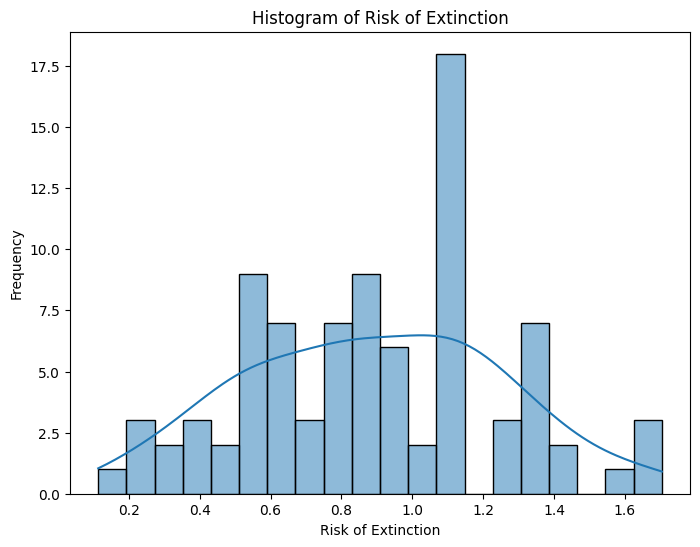

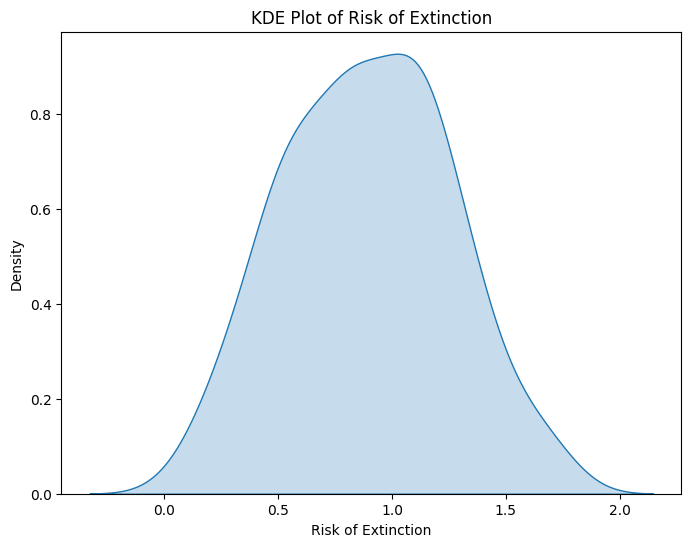

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_test['Risk of Extinction'], bins=20, kde=True)
plt.title('Histogram of Risk of Extinction')
plt.xlabel('Risk of Extinction')
plt.ylabel('Frequency')
plt.show()

# KDE Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df_test['Risk of Extinction'], fill=True)
plt.title('KDE Plot of Risk of Extinction')
plt.xlabel('Risk of Extinction')
plt.ylabel('Density')
plt.show()

In [ ]:
sorted_df = df_test.sort_values(by='Risk of Extinction', ascending=False)
top_10 = sorted_df.head(10)
top_10_species = top_10['Species']
print(top_10_species)

78             Isoplexis chalcantha
23     Coleocephalocereus purpureus
41        Dalbergia cochinchinensis
13                  Parodia herteri
75              Onopordum nogalesii
69                Delphinium caseyi
2     Coleocephalocereus diersianus
1        Coleocephalocereus braunii
76           Thesium subsucculentum
26            Uebelmannia buiningii
Name: Species, dtype: object


In [ ]:
selected_columns = df_test[['Species', 'Risk of Extinction']]

print(selected_columns)

                          Species  Risk of Extinction
0           Estevesia alex-bragae            0.602273
1      Coleocephalocereus braunii            1.363636
2   Coleocephalocereus diersianus            1.363636
3              Coprosma laevigata            0.375000
4         Impatiens angustisepala            0.886364
..                            ...                 ...
83                    Beta patula            0.659091
84             Geranium maderense            0.727273
85             Borderea chouardii            0.318182
86          Bencomia sphaerocarpa            1.295455
87           Onopordum carduelium            0.875000

[88 rows x 2 columns]


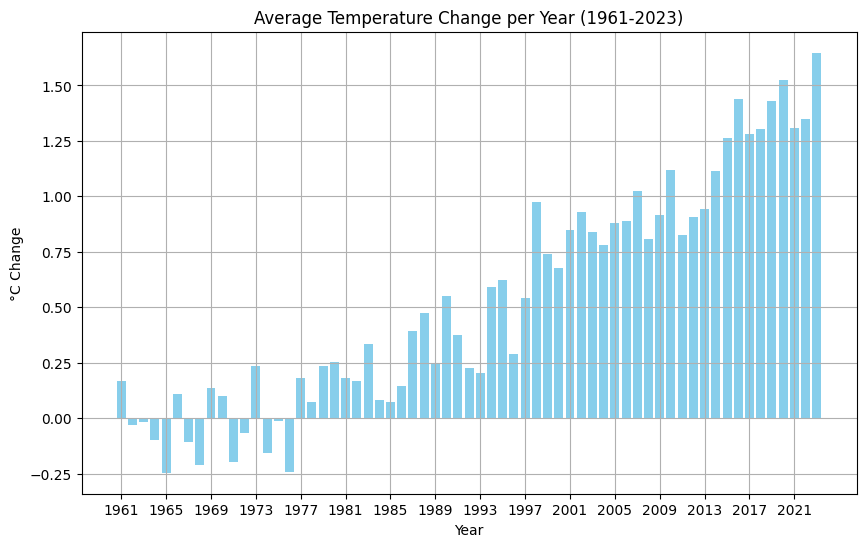

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Indicator_3_1_Climate_Indicators_Annual_Mean_Global_Surface_Temperature_577579683071085080.csv')

average_changes = df.iloc[:, 10:].mean()

years = average_changes.index.astype(int)
changes = average_changes.values

plt.figure(figsize=(10, 6))
plt.bar(years, changes, color='skyblue')
plt.xlabel('Year')
plt.ylabel('°C Change')
plt.title('Average Temperature Change per Year (1961-2023)')
plt.xticks(np.arange(min(years), max(years)+1, 4))
plt.grid(True)
plt.show()